In [1]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import random

In [2]:
import networkx as nx

In [321]:
random.seed(42)

In [4]:
dataset = pd.read_csv('wikigraph_reduced.csv', sep='\t', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1")
dataset.head()

,Unnamed: 0,0,1
0,796,95,1185516
1,909,108,1059989
2,910,108,1062426
3,911,108,1161925
4,1141,134,541222


In [5]:
dataset.columns=['Index','Source','Target']

In [6]:
# check if index columns has unique values
print(len(dataset.Index))
print(len(set(dataset.Index)))

483094
483094


In [7]:
dataset.set_index('Index' , inplace = True)
dataset.head()

,Source,Target
Index,,
796,95,1185516
909,108,1059989
910,108,1062426
911,108,1161925
1141,134,541222


#### Associate single category to each node

In [8]:
# all nodes in and out
unique_nodes = set(set(dataset.Source).union(set(dataset.Target)))
n_nodes = len(unique_nodes)
n_edges = len(dataset)

In [9]:
n_nodes

98343

In [10]:
category_file = 'wiki-topcats-categories.txt'

In [11]:
categories = {v: [] for v in unique_nodes}
lost = []
with open(category_file) as file:
    for i in range(17364):
        line = file.readline()
        category = line.split(';')[0].split(':')[-1]
        nodes = line.split(';')[1].split(' ')[1:-2]
        for node in nodes:
            try:
                categories[int(node)].append(category)
            except:
                lost.append(int(node))

In [12]:
categories_filtered = {}
for n in categories.keys():
    try:
        rand_category = random.choice(categories[n])
        categories_filtered[n] = rand_category
    except:
        categories_filtered[n] = None

In [13]:
categories_filtered

{1048576: 'Alumni_of_University_College,_Oxford',
 1048577: 'Year_of_death_missing',
 1048578: 'Fellows_of_University_College,_Oxford',
 1048579: 'Year_of_death_missing',
 786432: 'Rivers_of_Hunedoara_County',
 786433: 'Rivers_of_Hunedoara_County',
 1048582: 'Fellows_of_University_College,_Oxford',
 1048583: 'Year_of_birth_missing',
 1048584: 'Year_of_birth_missing',
 1048585: 'English_educators',
 1048586: 'Year_of_birth_missing',
 1048587: 'Fellows_of_University_College,_Oxford',
 1048588: 'Alumni_of_University_College,_Oxford',
 1048589: 'Year_of_death_missing',
 786437: 'Rivers_of_Suceava_County',
 786438: 'Rivers_of_Sibiu_County',
 786439: 'Rivers_of_Suceava_County',
 786440: 'Rivers_of_the_Siret_subbasin',
 786441: 'Rivers_of_the_Siret_subbasin',
 786442: 'Rivers_of_Neam_County',
 786443: 'Rivers_of_the_Siret_subbasin',
 786444: 'Rivers_of_Neam_County',
 786445: 'Rivers_of_the_Siret_subbasin',
 786446: 'Rivers_of_the_Siret_subbasin',
 786447: 'Rivers_of_the_Siret_subbasin',
 7864

#### Create graph

In [14]:
in_links = {v: [] for v in set(dataset.Source)}
out_links = {v: [] for v in set(dataset.Target)}

for row in dataset.iterrows():
    source = row[1][0]
    target = row[1][1]
    in_links[source].append(target)
    out_links[target].append(source)

In [15]:
links = in_links.copy()

In [16]:
links.update(out_links)

In [17]:
len(links)

98343

In [18]:
n_art_outlink = len(out_links)
n_art_inlink = len(in_links)

In [19]:
connections = []
for node in nodes:
    try:
        in_deg = len(in_links[node])
    except:
        in_deg = 0
    try:
        out_deg = len(out_links[node])
    except:
        out_deg = 0
    connections.append(in_deg+out_deg)

#### Check if directed

In [20]:
directed = False
for node in in_links:
    if len(set(in_links[node]).intersection(set(out_links[node]))) != 0:
        directed = True
        break
if directed:
    print('Graph is directed')
else:
    print('Graph is undirected')

Graph is directed


#### Density

In [21]:
density = (n_edges/(n_nodes*(n_nodes-1)))

In [22]:
n_edges/n_nodes

4.912337431235573

In [23]:
density

4.9951571365597335e-05

#### Visualize the nodes' degree distribution

In [24]:
my_len = [] 
for node in links.keys():
    my_len.append(len(links[node]))

In [25]:
my_len

[3,
 1,
 1,
 2,
 4,
 1,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 6,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 7,
 1,
 1,
 16,
 140,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 5,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 34,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 2,
 3,
 1,
 15,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 11,
 1,
 1,
 1,
 3,
 1,
 4,
 1,
 1,
 1,
 4,
 2,
 1,
 5,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 22,
 4,
 1,
 4,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 7,
 1,
 2,
 5,
 1,
 1,
 4,
 1,
 4,
 3,
 1,
 5,
 1,
 1,
 3,
 1,
 5,
 1,
 1,
 1,
 9,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 15,
 1,
 1,
 5,
 1,
 3,
 8,
 1,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 17,
 1,
 4,
 3,
 1,
 1,
 1,
 4,
 2,
 2,
 2,
 1,
 1,
 1,
 1

In [26]:
node_degree = dict(zip(links.keys(), my_len))
node_degree

{786432: 3,
 786433: 1,
 786434: 1,
 786435: 2,
 786436: 4,
 786437: 1,
 786438: 12,
 786439: 1,
 786440: 1,
 786441: 1,
 786442: 1,
 786443: 1,
 786444: 1,
 786445: 2,
 786446: 1,
 786447: 1,
 786448: 6,
 786449: 1,
 786450: 4,
 786451: 1,
 786452: 1,
 786453: 1,
 786454: 2,
 786455: 1,
 786456: 1,
 786457: 2,
 786458: 1,
 786459: 1,
 786460: 1,
 786461: 1,
 786462: 1,
 786463: 1,
 786464: 4,
 786465: 1,
 786466: 1,
 786467: 2,
 786468: 1,
 786469: 1,
 786470: 7,
 786471: 1,
 786472: 1,
 786473: 16,
 786474: 140,
 786475: 1,
 786476: 3,
 786477: 1,
 786478: 1,
 786479: 1,
 786480: 2,
 786481: 1,
 786482: 1,
 786483: 1,
 786484: 1,
 786485: 1,
 786486: 1,
 786487: 1,
 786488: 1,
 786489: 1,
 786490: 1,
 786491: 1,
 786492: 1,
 786493: 1,
 786494: 1,
 786495: 1,
 786496: 1,
 786497: 1,
 786498: 2,
 786499: 2,
 786500: 1,
 786501: 1,
 786502: 1,
 786503: 5,
 786504: 1,
 786505: 3,
 786506: 1,
 786507: 1,
 786508: 1,
 786509: 1,
 786510: 1,
 786511: 1,
 786512: 1,
 786513: 34,
 786514: 1,

In [27]:
sorted(my_len)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [28]:
from collections import Counter 

In [29]:
d = Counter(node_degree)

In [30]:
max(my_len)

10815

In [31]:
counter_supp = list()
for i in range(1, max(my_len)):
    counter_supp.append(my_len.count(i))

In [32]:
counter = [0]
for i in range(1, max(my_len)):
    counter.append(counter[-1]+my_len.count(i))

In [33]:
max_counter = max(counter)
normalized_counter = []
for i in counter:
    normalized_counter.append(i/max_counter)

In [34]:
counter_supp

[43624,
 14224,
 8525,
 5979,
 4343,
 3324,
 2563,
 2111,
 1685,
 1372,
 1114,
 989,
 808,
 719,
 599,
 497,
 484,
 391,
 360,
 334,
 284,
 281,
 219,
 216,
 194,
 175,
 180,
 155,
 119,
 135,
 125,
 101,
 91,
 90,
 103,
 95,
 72,
 70,
 79,
 68,
 47,
 54,
 58,
 39,
 48,
 46,
 40,
 41,
 43,
 44,
 35,
 27,
 38,
 35,
 37,
 15,
 27,
 32,
 23,
 20,
 21,
 19,
 23,
 24,
 15,
 8,
 20,
 21,
 16,
 8,
 13,
 5,
 15,
 14,
 12,
 7,
 15,
 10,
 6,
 13,
 12,
 11,
 11,
 5,
 12,
 6,
 13,
 9,
 9,
 8,
 3,
 11,
 8,
 7,
 7,
 5,
 9,
 2,
 5,
 4,
 7,
 8,
 4,
 8,
 6,
 5,
 2,
 3,
 7,
 5,
 6,
 4,
 2,
 3,
 2,
 6,
 4,
 3,
 4,
 9,
 4,
 2,
 3,
 3,
 0,
 3,
 3,
 0,
 7,
 0,
 0,
 1,
 1,
 4,
 6,
 1,
 3,
 2,
 1,
 1,
 3,
 0,
 2,
 3,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 3,
 1,
 5,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 3,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 

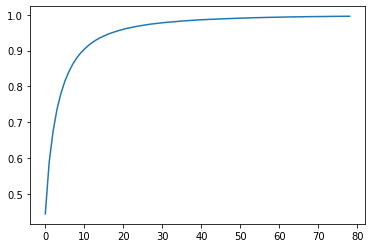

In [35]:
plt.plot(normalized_counter[1:80]);

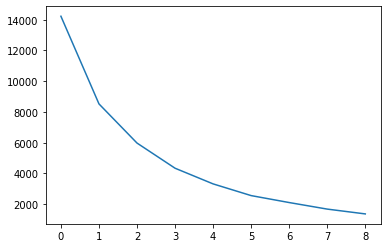

In [36]:
plt.plot(counter_supp[1:10]);

## RQ4

Given in input two categories: C1 and C2, we get the subgraph induced by all the articles in the two categories.

- Let v and u two arbitrary pages in the subgraph. What is the minimum set of hyperlinks one can remove to disconnect u and v?

In [444]:
#links

In [193]:
categories_filtered[1049773]

'16th-century_English_people'

Using networkx

In [194]:
G = nx.Graph()

In [195]:
for row in dataset.iterrows():
    G.add_edge(row[1][0], row[1][1], capacity=1)

In [442]:
len(list(G.nodes))

98343

In [197]:
G.number_of_edges()

353242

In [198]:
H = G.to_undirected()

In [199]:
H.number_of_edges()

353242

In [443]:
#H.nodes.data()

In [201]:
#H.nodes[95]['category'] = 714

In [202]:
def add_categories(my_category, G):
    for i in my_category.keys():
        G.nodes[i]['category']=my_category[i]
    return G

In [203]:
add_categories(categories_filtered, H)

In [204]:
H.number_of_edges()

353242

In [441]:
def get_subgraph(G, c1, c2):
    new_graph = G.copy()
    for i in list(new_graph.nodes):
        if new_graph.nodes[i]['category']!=c1 and new_graph.nodes[i]['category']!=c2:
            new_graph.remove_node(i)
    return new_graph

In [209]:
sub_category_graph = get_subgraph(H, 'American_television_actors', 'Films_based_on_novels')
sub_category_graph.number_of_edges()

721

In [439]:
#sub_category_graph.nodes.data()

In [440]:
#sub_category_graph.edges()

In [212]:
a=random.choice(list(sub_category_graph.nodes))
b=random.choice(list(sub_category_graph.nodes))

data = list(sub_category_graph.degree([a, b]))
d2 = [item[1] for item in data]
data, d2

([(1377905, 0), (772594, 1)], [0, 1])

In [213]:
degree = {}
for i in sub_category_graph.nodes:
    degree[i]=sub_category_graph.degree(i)

degree[max(degree, key=lambda key: degree[key])], len(sub_category_graph.nodes)

(24, 2304)

In [214]:
for i in list(sub_category_graph.nodes):
    print(i, sub_category_graph.degree(i))

744272 0
1064807 2
146870 1
1088 0
1028633 1
1063918 2
1161782 0
1059640 2
1064206 0
1106 0
1124 0
1138 0
1149 1
1573762 1
1049917 0
1163499 1
1061913 12
1064995 1
1061568 4
1054873 1
725503 0
1044977 1
1062126 0
1062603 7
1163311 3
1247955 1
1163137 2
1061028 2
1069904 1
1165430 0
1141478 2
1165126 3
725154 0
1064485 1
1163500 2
1058200 1
1062104 2
26503 0
1061890 3
1061038 7
30850 1
146785 1
1061773 6
1063685 1
1129826 0
39423 0
1253800 0
1060920 1
1062238 1
1664234 0
1161467 0
1163659 6
1162373 0
166629 1
1129784 1
1224929 2
53906 2
1058802 0
1058810 1
1060749 3
53884 1
554657 0
1163092 1
1164097 1
1166309 1
501404 0
1062489 4
1162651 3
1069897 2
1163479 5
1150230 1
68381 0
1163955 1
1236305 0
1161325 1
71682 0
1059549 4
1062122 5
1165429 4
1504659 0
72551 0
1063059 1
757080 2
1061630 4
1061274 2
1165662 4
711868 0
1775392 1
1165701 3
1060323 1
1165744 4
1061701 5
1163925 2
1062740 2
110138 0
1054493 0
110145 0
110157 0
110162 0
400394 0
400615 2
110353 0
110387 0
1058080 3
1165718 

744815 0
744341 0
1130689 0
744496 0
744616 0
744939 0
1130679 0
1504263 1
745337 0
1141502 0
745816 0
745968 1
1151245 0
1299893 0
1061306 2
749682 0
1224146 2
1014490 0
1073626 0
757161 1
757081 2
1062462 1
757340 0
903927 0
765070 0
1165937 0
1275637 2
767994 0
768087 0
1161090 2
768482 1
627093 0
769450 0
901228 0
771384 0
771385 0
771393 0
1130050 0
771510 0
771522 0
1166009 1
771530 1
1139046 0
772594 1
1060660 1
1130931 0
773796 0
1060864 3
773949 0
773976 1
774229 0
1164903 1
1166204 1
1050015 0
1709442 0
1060865 2
774662 0
1163893 3
775050 0
1014564 0
1167229 2
1130808 0
775459 0
633773 0
1166607 0
1163049 0
777505 0
1064467 4
1502497 0
1165166 3
1057623 0
795802 0
796236 0
1162930 0
801547 0
1165694 1
803817 1
804354 0
1151422 2
146881 0
810690 0
810975 0
1170313 2
1068054 0
1054427 0
811217 0
1169797 0
1061793 1
1085646 0
813743 0
1065190 0
1169667 0
1161440 0
1377358 1
1058430 1
1169568 0
1464088 0
818208 0
819504 0
1060682 3
1592526 0
821179 0
1053762 0
1161002 2
1246864 0

In [215]:
#list(H.neighbors(784194))

In [216]:
#list(H.neighbors(217626))

In [219]:
def find_all_connected_nodes(g, starter_node):
    visited = []
    queue = []
    
    visited.append(starter_node)
    queue.append(starter_node)
    
    nodes = []
    
    while queue:
        s = queue.pop(0)
        nodes.append(s)
        
        for neighbour in g[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
                
    return nodes

In [390]:
def shortes_path(g, u, v):
    
    '''
    This function calculate the shortest path of a graph
    
    '''
    
    if u == v:
        return 'same node'  
    
    visited = []
    queue = [[u]]
    
    visited.append(u)
    #queue.append(u)
    
    nodes = []
    
    while queue:
        s = queue.pop(0)
        
        for neighbour in g[s[-1]]:
            if neighbour not in visited:
                nodes = list(s)
                nodes.append(neighbour)
                queue.append(nodes)
                visited.append(neighbour)
                
                if neighbour == v:
                    return nodes
                
    return 'NotPossible'

In [389]:
find_paths(subgraph, u, v)

[[1061503, 1163479, 1163088, 1164985, 1164980],
 [1061503, 1165303, 1165344, 358008, 1164985, 1164980],
 'NotPossible']

In [355]:
subgraph = sub_category_graph.copy()

In [308]:
#subgraph.remove_node(1163479)

In [309]:
nx.shortest_path(subgraph, u, v)

[1061503, 1163479, 1163088, 1164985, 1164980]

In [283]:
a = (find_all_connected_nodes(subgraph, 1166042))
print(len(a))
#a

471


In [249]:
u=1061503#random.choice(list(subgraph.nodes))
v=1164980#random.choice(list(subgraph.nodes))

In [250]:
all_shortes_path(subgraph, u, v)

[[1061503, 1163479, 1163088, 1164985, 1164980]]

In [251]:
nx.shortest_path(subgraph, u, v)

[1061503, 1163479, 1163088, 1164985, 1164980]

In [254]:
t = nx.all_simple_paths(subgraph, u, v)
sp = nx.shortest_path(subgraph, u, v)

In [93]:
#reduced_graph = H.copy()

In [385]:
#my_u = make_the_tree(subgraph, u, 32)

In [184]:
reduced_graph = subgraph.copy()
for i in list(subgraph.nodes):
    if i in a:
        pass
    else:
        reduced_graph.remove_node(i)

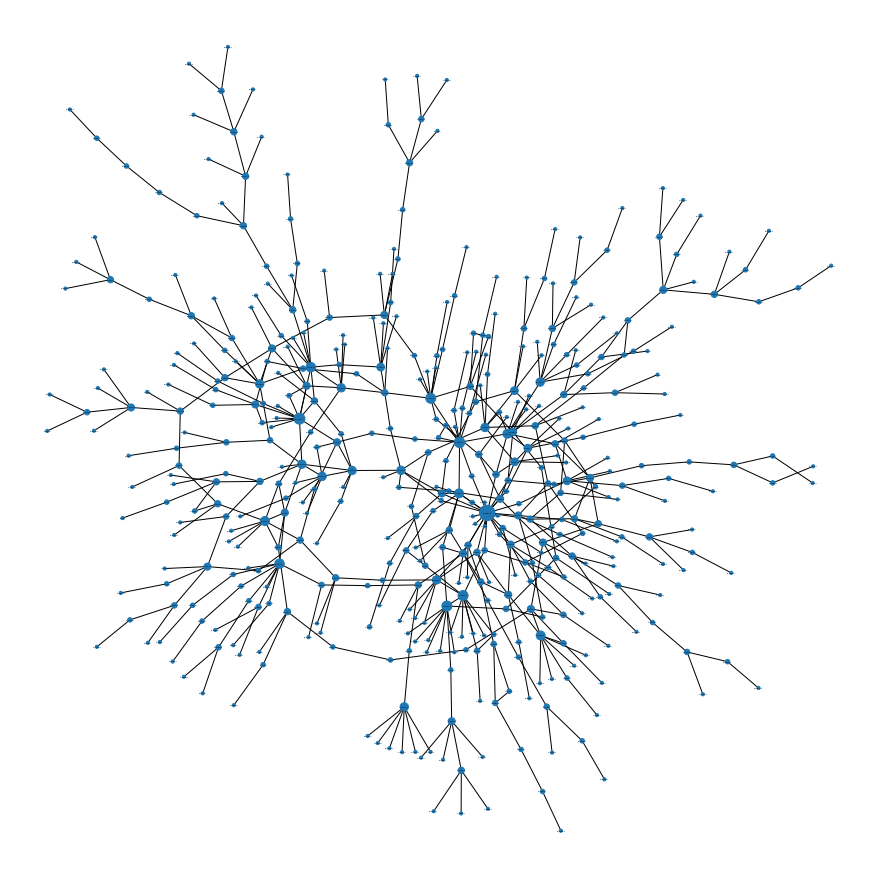

In [164]:
node_sizes = [10*len(reduced_graph.edges(n)) for n in reduced_graph.nodes()]
#networkx.draw_spring(g, node_size=(node_sizes))
#nx.draw_kamada_kawai(subgraph, node_size=(node_sizes), with_labels=True)#785539

# default
plt.figure(1, figsize=(12,12))
nx.draw_kamada_kawai(reduced_graph, node_size=(node_sizes), with_labels=True, size=1, font_size = 2)

plt.show()

In [427]:
def simple_min_cut(g, u, v, starter):
    
    '''
    1. Chose one path from u to v --> starter
    2. Remove all edges of the path
    3. Reapet 1 and 2 until there's no path
    4. return the number of path found
    '''

    print(f'random_path: {starter}')
    index=1
    
    my_g = g.copy()
    for j in range(1, len(starter)):
        my_g.remove_edge(starter[j-1], starter[j])
        #print(f'{index} removed: {starter[j-1]}, {starter[j]}')

    while True:
        try:
            nodes_list = shortest_path(my_g, u, v)
            print('----')
        except:
            print(f'Another path not found! MinCut: {index}')
            break

        index+=1
        for j in range(1, len(nodes_list)):
            my_g.remove_edge(nodes_list[j-1], nodes_list[j])
            print(f'{index} removed: {nodes_list[j-1]}, {nodes_list[j]}')

    return index

In [438]:
def augmented_min_cut(g, u, v):
    
    '''
    1) if u and v are the same node -> return 'same node'
    2) if deg of u or v is 1 -> return 1
    3) paths = call find_paths to calculate different paths
    4) if paths have just one path -> return 1
    5) use simple_min_cut for each path in paths
    6) return the max of the min cuts
    '''
    '''
    if u == v:
        return 'Same node'
    
    if g.degree(u) == 1 or g.degree(v) == 1:
        return 1
    '''
    paths = find_paths(g, u, v)
    print(paths)
    lenght = len(paths)
    if lenght == 2:
        return 1
    results = []
    
    for i in range(lenght-1):
        index = simple_min_cut(g, u, v, paths[i]) 
        results.append(index)
    
    print(results)
    return max(results)

In [437]:
augmented_min_cut(subgraph, u, v)

[[1061503, 1163479, 1163088, 1164985, 1164980], [1061503, 1165303, 1165344, 358008, 1164985, 1164980], [1061503, 1165429, 1163416, 1163623, 358008, 1164985, 1164980], [1061503, 1163664, 1163731, 1163736, 1165344, 358008, 1164985, 1164980], [1061503, 1165146, 1165286, 1161081, 1165344, 358008, 1164985, 1164980], [1061503, 1165203, 1165155, 1061807, 1061794, 1061925, 1198150, 1061842, 1060728, 1151558, 1161853, 358008, 1164985, 1164980], [1061503, 1165333, 1165155, 1061807, 1061794, 1061925, 1198150, 1061842, 1060728, 1151558, 1161853, 358008, 1164985, 1164980], [1061503, 1165429, 1061592, 1224929, 1061775, 1065285, 1061954, 1198150, 1061842, 1060728, 1151558, 1161853, 358008, 1164985, 1164980], 'NotPossible']
random_path: [1061503, 1163479, 1163088, 1164985, 1164980]
Another path not found! MinCut: 1
random_path: [1061503, 1165303, 1165344, 358008, 1164985, 1164980]
Another path not found! MinCut: 1
random_path: [1061503, 1165429, 1163416, 1163623, 358008, 1164985, 1164980]
Another path

1

In [262]:
cut_value, partition = nx.minimum_cut(subgraph, u, v)
cut_value

1

In [86]:
len(list(subgraph.nodes))

4

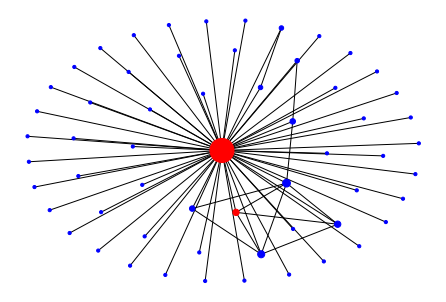

In [241]:
color_map = []
for node in reduced_graph:
    if node == a or node == b:
        color_map.append('red')
    else: 
        color_map.append('blue')      
#nx.draw(G, node_color=color_map, with_labels=True)


node_sizes = [10*len(reduced_graph.edges(n)) for n in reduced_graph.nodes()]
#networkx.draw_spring(g, node_size=(node_sizes))
nx.draw_kamada_kawai(reduced_graph, node_size=(node_sizes), node_color=color_map, with_labels=False)

In [217]:
def make_the_tree(H, u, v):
    
    min_deg = (10000,list())
    
    dicty = {}
    ng_list = set(H.neighbors(u))

    if ng_list == set():
        return dict
    dicty[0] = [u]
    print(f'dicty[{0}]: {[dicty[0]]}')
    index = 1

    add_element(dicty, index, ng_list)
    min_deg = check_degree(ng_list, min_deg, len(ng_list))
    print(f'dicty[{index}]: {dicty[index]}')
    print(f'len dicty[{index}]: {len(dicty[index])}')
    if v in ng_list:
        print('Stop')
    else:
        while ng_list!=set():
            ng_list=set()
            for i in dicty[index]:
                neighbors = set(list(H.neighbors(i)))
                difference_update(neighbors,dicty[index-1])
                difference_update(neighbors,dicty[index])
                for j in neighbors:
                    ng_list.add(j)
                difference_update(ng_list,dicty[index-1]) #utile??? XD

            index += 1
            add_element(dicty, index, ng_list)
            min_deg = check_degree(ng_list, min_deg, len(ng_list))
            print(f'dicty[{index}]: {dicty[index]}')
            print(f'len dicty[{index}]: {len(dicty[index])}')

            if v in ng_list:
                print('Stop')
                #break

    return dicty

def check_degree(ng_list,a,b):
    if a[0]>b:
        return b, ng_list
    return a[0],a[1]

def difference_update(a,b):
    a -= set(b)
#    try:
#        a -= set(b)
#    except:
#        a -= set([b])

def check_a_in_dict(dict, a):
    for i in dict.keys():
        for value in dict[i]:
            if value == a:
                return True
    return False
    
def add_element(dic, index, lis):
    dic[index]=[]
    for i in lis:
        dic[index].append(i)    
        
def min_cut(g, a, b):
    deg_a = g.degree(a)
    deg_b = g.degree(b)
    min_a_b = min(deg_a, deg_b)
    print(deg_a, deg_b)
    
    from_a = make_the_tree(g, a, b)
    if from_a == 0:
        print('a and b are already disconnected')
        return 0
    

    
    if min_a_b < 2:
        return min_a_b
    
    from_b = make_the_tree(g, b, a)
    
    if from_a[0] <= from_b[0]:
        res = min_cut(g, a, b)
    else:
        print(b, list(from_b[1])[0])
        g.remove_edge(b, list(from_b[1])[0])
        res = min_cut(g, b, a)
    
    return res

In [450]:
%%time
a = 786269
b = 722041
min_cut(H, a, b)

25 2
dicty[0]: [[786269]]
dicty[1]: [889862, 996362, 787340, 787085, 787091, 783775, 931104, 787635, 786229, 72120, 785474, 1672011, 786256, 787286, 1250519, 786266, 786267, 786274, 1686754, 369514, 788080, 783605, 1677558, 1622521, 787579]
len dicty[1]: 25
dicty[2]: [1622657, 785666, 787080, 787337, 1670153, 787339, 787087, 783503, 722065, 787090, 886675, 787867, 783771, 931105, 931106, 787620, 783782, 783784, 787497, 787634, 787891, 783799, 785850, 413124, 786245, 721990, 1772358, 783816, 786246, 786249, 722382, 785487, 785489, 787285, 722264, 999898, 722543, 722045]
len dicty[2]: 38
dicty[3]: [785667, 722052, 722054, 722055, 783498, 783499, 722062, 783504, 783760, 217491, 886679, 832804, 787498, 783659, 1002426, 783803, 1622717, 783808, 785345, 786248, 783819, 783821, 785488, 785491, 783828, 722524, 787935, 369515, 722041]
len dicty[3]: 29
Stop
dicty[0]: [[722041]]
dicty[1]: [722042, 722045]
len dicty[1]: 2
dicty[2]: [722052, 722054, 722055, 783760, 786266, 1622717]
len dicty[2]: 6


1

In [388]:
my_u = make_the_tree(H, 786269, 72128)
#check_a_in_dict(my_u, 787498)
my_u

dicty[0]: [[786269]]
dicty[1]: [889862, 996362, 787340, 787085, 787091, 783775, 931104, 787635, 786229, 72120, 785474, 1672011, 786256, 787286, 1250519, 786266, 786267, 786274, 1686754, 369514, 788080, 783605, 1677558, 1622521, 787579]
len dicty[1]: 25
dicty[2]: [1622657, 785666, 787080, 787337, 1670153, 787339, 787087, 783503, 722065, 787090, 886675, 787867, 783771, 931105, 931106, 787620, 783782, 783784, 787497, 787634, 787891, 783799, 785850, 413124, 786245, 721990, 1772358, 783816, 786246, 786249, 722382, 785487, 785489, 787285, 722264, 999898, 722543, 722045]
len dicty[2]: 38
dicty[3]: [785667, 722052, 722054, 722055, 783498, 783499, 722062, 783504, 783760, 217491, 886679, 832804, 787498, 783659, 1002426, 783803, 1622717, 783808, 785345, 786248, 783819, 783821, 785488, 785491, 783828, 722524, 787935, 369515, 722041]
len dicty[3]: 29
dicty[4]: [72128, 785570, 785571, 783810, 783653, 783812, 1678051, 722042, 783662, 783664, 783665, 783762, 783668, 783669, 783804, 783675, 722140, 722

18